In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import re

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [4]:
len(df)

19237

In [5]:
df.describe()

ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
df['Manufacturer'] = df['Manufacturer'].str.lower()
df['Model'] = df['Model'].str.lower()

In [8]:
df.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        lexus   rx 450        2010       Jeep   
1  44731507  16621  1018    chevrolet  equinox        2011       Jeep   
2  45774419   8467     -        honda      fit        2006  Hatchback   
3  45769185   3607   862         ford   escape        2011       Jeep   
4  45809263  11726   446        honda      fit        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [9]:
#See unique values in objects
to_group=[]
for i in df.columns: 
    if df[i].dtype == 'O':
        to_group.append(i)
for i in df.columns: 
    print(i ,df[i].nunique())

ID 18924
Price 2315
Levy 559
Manufacturer 65
Model 1511
Prod. year 54
Category 11
Leather interior 2
Fuel type 7
Engine volume 107
Mileage 7687
Cylinders 13
Gear box type 4
Drive wheels 3
Doors 3
Wheel 2
Color 16
Airbags 17


In [10]:
#check missing data
len(df)

19237

In [11]:
df.drop('Levy', axis = 1, inplace=True)

In [12]:
df.head()

ID  Price Manufacturer    Model  Prod. year   Category  \
0  45654403  13328        lexus   rx 450        2010       Jeep   
1  44731507  16621    chevrolet  equinox        2011       Jeep   
2  45774419   8467        honda      fit        2006  Hatchback   
3  45769185   3607         ford   escape        2011       Jeep   
4  45809263  11726        honda      fit        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [13]:
df[df['Manufacturer']=='LEXUS'].Model.str.lower().nunique()

0

In [14]:
df['Mileage'] = df['Mileage'].str.rstrip('km')
df['Mileage'] = pd.to_numeric(df['Mileage'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

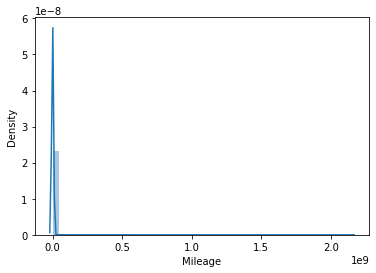

In [16]:
sns.distplot(df['Mileage'])

In [17]:
df[df['Price']<=10000]

ID  Price   Manufacturer    Model  Prod. year   Category  \
2      45774419   8467          honda      fit        2006  Hatchback   
3      45769185   3607           ford   escape        2011       Jeep   
6      45656768   1803         toyota    prius        2010  Hatchback   
7      45816158    549        hyundai   sonata        2013      Sedan   
8      45641395   1098         toyota    camry        2014      Sedan   
...         ...    ...            ...      ...         ...        ...   
19230  45760891    470         toyota    prius        2011  Hatchback   
19231  45772306   5802  mercedes-benz    e 350        2013      Sedan   
19232  45798355   8467  mercedes-benz  clk 200        1999      Coupe   
19235  45793526   5331      chevrolet  captiva        2007       Jeep   
19236  45813273    470        hyundai   sonata        2012      Sedan   

      Leather interior Fuel type Engine volume  Mileage  Cylinders  \
2                   No    Petrol           1.3   200000        4.0   
3                  Yes    Hybrid           2.5   168966        4.0   
6                  Yes    Hybrid           1.8   258909        4.0   
7                  Yes    Petrol           2.4   216118        4.0   
8                  Yes    Hybrid           2.5   398069        4.0   
...                ...       ...           ...      ...        ...   
19230              Yes    Hybrid           1.8   307325        4.0   
19231              Yes    Diesel           3.5   107800        6.0   
19232              Yes       CNG     2.0 Turbo   300000        4.0   
19235              Yes    Diesel             2    51258        4.0   
19236              Yes    Hybrid           2.4   186923        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
6         Automatic        Front  04-May        Left wheel   White       12  
7         Automatic        Front  04-May        Left wheel    Grey       12  
8         Automatic        Front  04-May        Left wheel   Black       12  
...             ...          ...     ...               ...     ...      ...  
19230     Automatic        Front  04-May        Left wheel  Silver       12  
19231     Automatic         Rear  04-May        Left wheel    Grey       12  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[7595 rows x 17 columns]

In [18]:
df['Mileage'] = df['Mileage'].astype(np.int64)
df['Price'] = df['Price'].astype(np.int64)

In [19]:
df.dropna()

ID  Price   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328          lexus   rx 450        2010       Jeep   
1      44731507  16621      chevrolet  equinox        2011       Jeep   
2      45774419   8467          honda      fit        2006  Hatchback   
3      45769185   3607           ford   escape        2011       Jeep   
4      45809263  11726          honda      fit        2014  Hatchback   
...         ...    ...            ...      ...         ...        ...   
19232  45798355   8467  mercedes-benz  clk 200        1999      Coupe   
19233  45778856  15681        hyundai   sonata        2011      Sedan   
19234  45804997  26108        hyundai   tucson        2010       Jeep   
19235  45793526   5331      chevrolet  captiva        2007       Jeep   
19236  45813273    470        hyundai   sonata        2012      Sedan   

      Leather interior Fuel type Engine volume  Mileage  Cylinders  \
0                  Yes    Hybrid           3.5   186005        6.0   
1                   No    Petrol             3   192000        6.0   
2                   No    Petrol           1.3   200000        4.0   
3                  Yes    Hybrid           2.5   168966        4.0   
4                  Yes    Petrol           1.3    91901        4.0   
...                ...       ...           ...      ...        ...   
19232              Yes       CNG     2.0 Turbo   300000        4.0   
19233              Yes    Petrol           2.4   161600        4.0   
19234              Yes    Diesel             2   116365        4.0   
19235              Yes    Diesel             2    51258        4.0   
19236              Yes    Hybrid           2.4   186923        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19237 rows x 17 columns]

<AxesSubplot:>

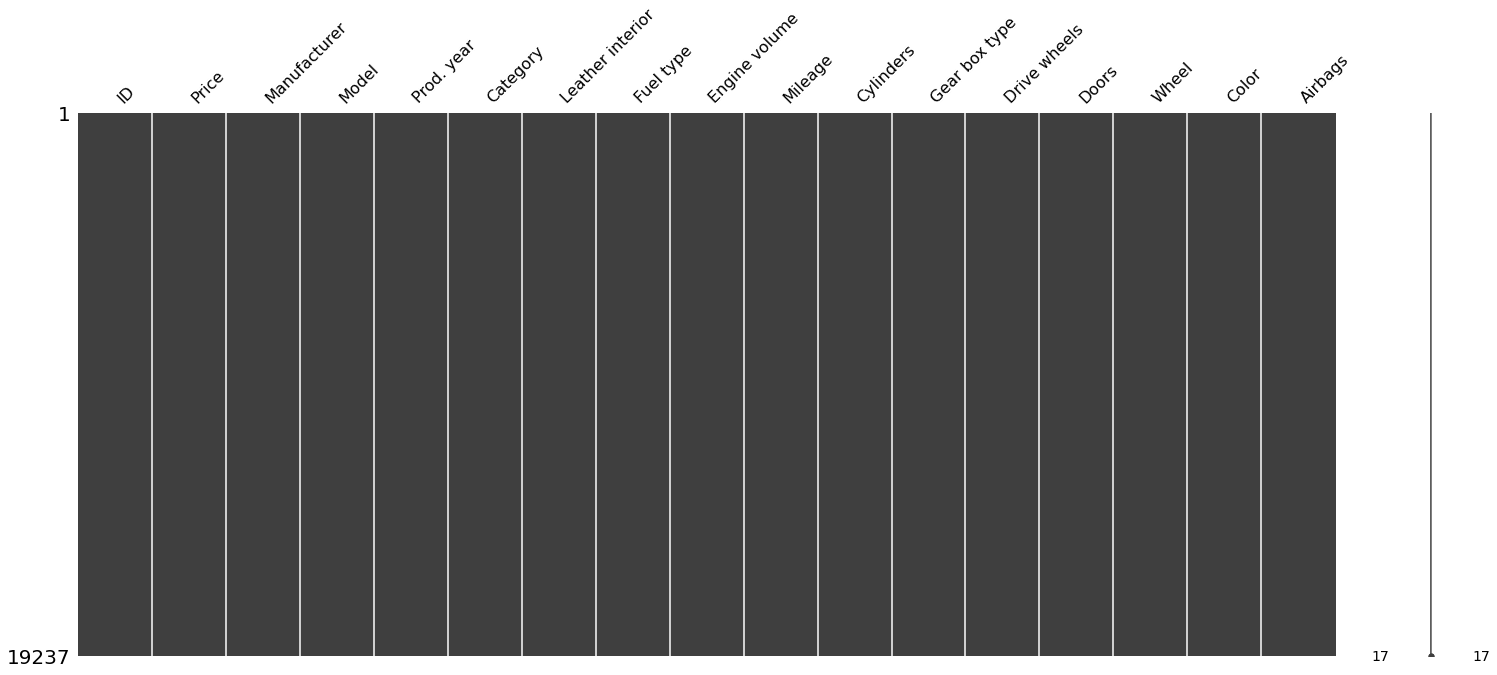

In [20]:
msno.matrix(df)

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

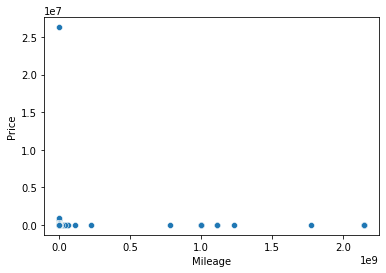

In [21]:
sns.scatterplot(data=df, x='Mileage', y='Price')

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

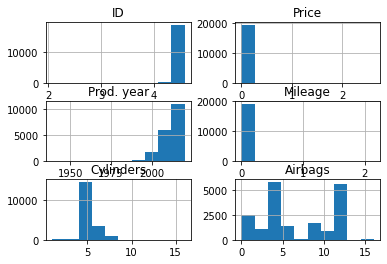

In [22]:
df.hist()
df.info()

In [23]:
#Let's drop limit mileage data
index_names = df[(df['Mileage'] == 0)].index
df.drop(index_names, inplace = True)
index_names2 = df[(df['Mileage'] >= 400000)].index
df.drop(index_names2, inplace = True)
df.sort_values('Mileage')

ID   Price   Manufacturer        Model  Prod. year   Category  \
12503  45115490   17562      chevrolet        cruze        2019  Hatchback   
17566  38654026     135         toyota  corolla 140        2019      Sedan   
1626   45732087   96915        hyundai     santa fe        2020       Jeep   
11920  45803551   61781        hyundai       sonata        2020      Sedan   
2353   45804409  116036  mercedes-benz        x 250        2019     Pickup   
...         ...     ...            ...          ...         ...        ...   
18137  45646059    1098         toyota        camry        2014      Sedan   
6141   45646488    1098         toyota        camry        2014      Sedan   
17198  45645788    1098         toyota        camry        2014      Sedan   
9086   45641259    1098         toyota        camry        2014      Sedan   
12463  45728027     157          lexus       rx 450        2015       Jeep   

      Leather interior Fuel type Engine volume  Mileage  Cylinders  \
12503               No    Petrol           1.4       13        4.0   
17566               No    Petrol           1.6       18        4.0   
1626               Yes    Petrol             2       21        4.0   
11920              Yes    Petrol             2       98        4.0   
2353               Yes    Diesel           2.5      102        4.0   
...                ...       ...           ...      ...        ...   
18137              Yes    Hybrid           2.5   398069        4.0   
6141               Yes    Hybrid           2.5   398069        4.0   
17198              Yes    Hybrid           2.5   398069        4.0   
9086               Yes    Hybrid           2.5   398069        4.0   
12463              Yes    Hybrid           3.5   399906        6.0   

      Gear box type Drive wheels   Doors       Wheel   Color  Airbags  
12503     Automatic        Front  04-May  Left wheel   Black        8  
17566      Variator        Front  04-May  Left wheel   Black       12  
1626      Automatic        Front  04-May  Left wheel    Grey        4  
11920     Automatic        Front  04-May  Left wheel   White        4  
2353      Automatic          4x4  04-May  Left wheel  Silver       12  
...             ...          ...     ...         ...     ...      ...  
18137     Automatic        Front  04-May  Left wheel   Black       12  
6141      Automatic        Front  04-May  Left wheel   Black       12  
17198     Automatic        Front  04-May  Left wheel   Black       12  
9086      Automatic        Front  04-May  Left wheel   Black       12  
12463     Automatic          4x4  04-May  Left wheel   Black       12  

[18037 rows x 17 columns]

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Prod. year'}>,
        <AxesSubplot:title={'center':'Mileage'}>],
       [<AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Airbags'}>]], dtype=object)

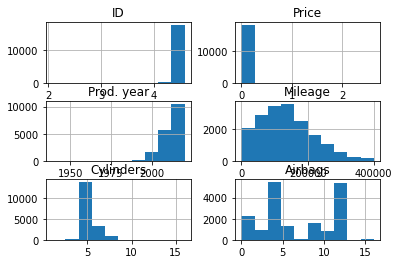

In [24]:
df.hist()

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

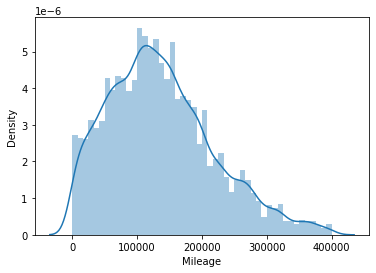

In [25]:
sns.distplot(df['Mileage'])

In [26]:
index_namesP = df[(df['Price'] <= 100)].index
df.drop(index_namesP, inplace = True)
index_namesP2 = df[(df['Price'] >= 100000)].index
df.drop(index_namesP2, inplace = True)
df.sort_values('Price')

ID  Price   Manufacturer     Model  Prod. year Category  \
7960   45786476    110         nissan     quest        2010  Minivan   
15050  40220601    110            bmw        x5        2008     Jeep   
11948  45807545    110  mercedes-benz     c 300        2015    Sedan   
13688  45642650    110        hyundai  santa fe        2019     Jeep   
4408   43701086    110         toyota     camry        2013    Sedan   
...         ...    ...            ...       ...         ...      ...   
10372  45802548  98066        hyundai  santa fe        2019  Minivan   
2728   45808865  98282           ford  explorer        2017     Jeep   
9405   45781828  98787          lexus    gx 460        2014     Jeep   
10230  45804437  99440          lexus    nx 300        2016     Jeep   
14181  45808855  99440           ford  explorer        2017     Jeep   

      Leather interior Fuel type Engine volume  Mileage  Cylinders  \
7960               Yes    Petrol           3.5    70000        6.0   
15050              Yes    Petrol             3   121121        6.0   
11948              Yes    Petrol             2    64003        4.0   
13688              Yes    Petrol             2    28797        4.0   
4408               Yes    Petrol           2.5   208000        4.0   
...                ...       ...           ...      ...        ...   
10372              Yes    Diesel           2.2    17632        4.0   
2728               Yes    Petrol           3.5    20000        4.0   
9405               Yes    Petrol           4.6    76000        8.0   
10230              Yes    Hybrid           2.5    40450        4.0   
14181              Yes    Petrol           2.3    44643        4.0   

      Gear box type Drive wheels   Doors       Wheel   Color  Airbags  
7960      Automatic        Front  04-May  Left wheel  Silver        8  
15050     Automatic          4x4  04-May  Left wheel   Black       10  
11948     Automatic         Rear  04-May  Left wheel  Silver       12  
13688     Automatic        Front  04-May  Left wheel   White       12  
4408      Tiptronic        Front  04-May  Left wheel   Black       12  
...             ...          ...     ...         ...     ...      ...  
10372     Automatic        Front  04-May  Left wheel   White        4  
2728      Automatic        Front  04-May  Left wheel   White        4  
9405      Tiptronic          4x4  04-May  Left wheel    Grey       12  
10230     Automatic        Front  04-May  Left wheel   White        4  
14181     Automatic        Front  04-May  Left wheel   Black        4  

[17609 rows x 17 columns]

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

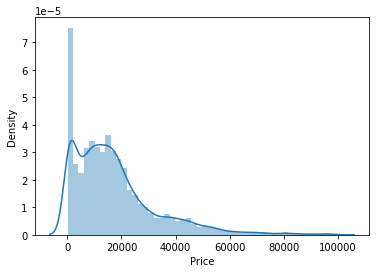

In [27]:
sns.distplot(df.Price)

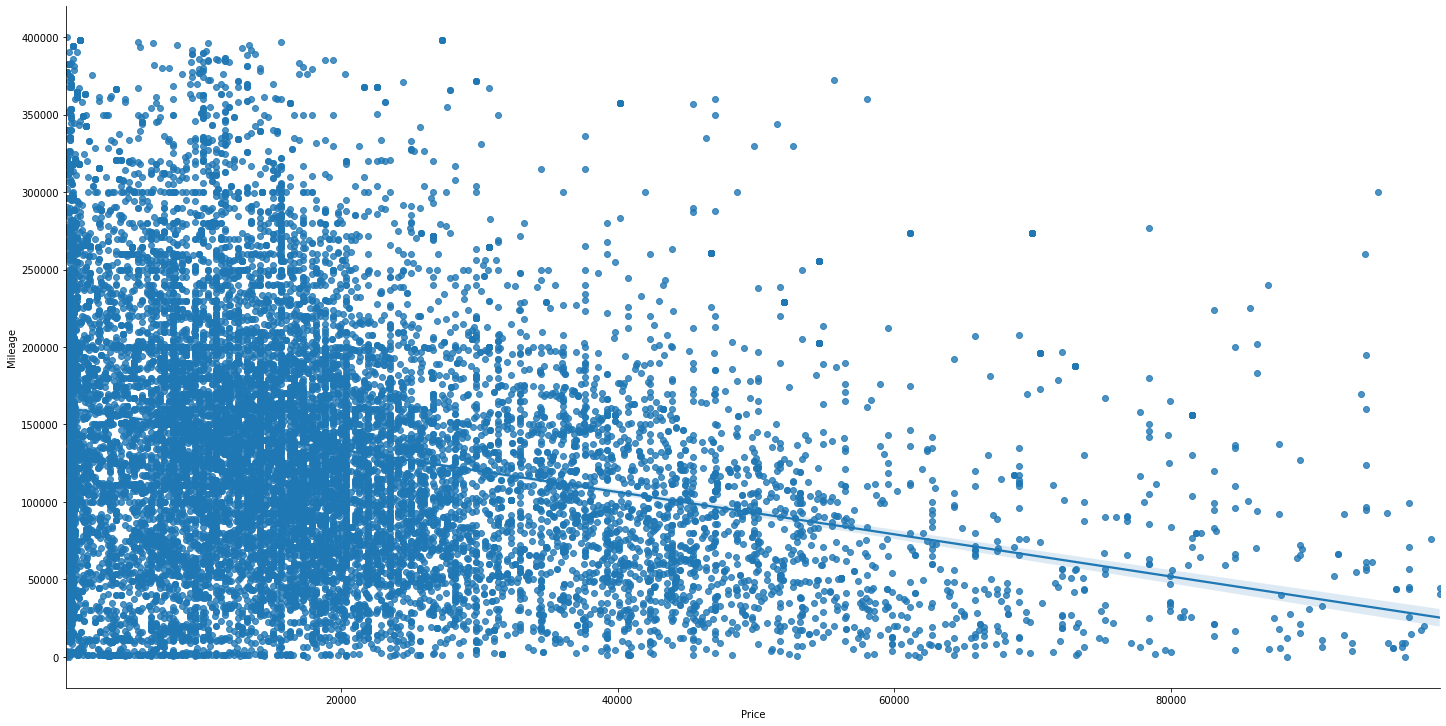

In [28]:
sns.lmplot(data = df, x='Price', y='Mileage', height=10, aspect=2)
#Expected, more mileage => less price

In [29]:
df[df['Price']<=1000]

ID  Price   Manufacturer    Model  Prod. year   Category  \
7      45816158    549        hyundai   sonata        2013      Sedan   
10     45621750    941  mercedes-benz    e 350        2014      Sedan   
15     45465200    549         toyota      chr        2018       Jeep   
18     45772104    549        hyundai   sonata        2006      Sedan   
19     45653306    941          lexus   rx 400        2008       Jeep   
...         ...    ...            ...      ...         ...        ...   
19201  45813639    549          lexus  hs 250h        2010      Sedan   
19215  45763841    470        hyundai  elantra        2017      Sedan   
19228  45773726    706  mercedes-benz    e 350        2008      Sedan   
19230  45760891    470         toyota    prius        2011  Hatchback   
19236  45813273    470        hyundai   sonata        2012      Sedan   

      Leather interior Fuel type Engine volume  Mileage  Cylinders  \
7                  Yes    Petrol           2.4   216118        4.0   
10                 Yes    Diesel           3.5   184467        6.0   
15                 Yes    Petrol             2    74146        4.0   
18                 Yes    Petrol           3.3   295059        6.0   
19                 Yes    Hybrid           3.5   364523        6.0   
...                ...       ...           ...      ...        ...   
19201              Yes    Hybrid           2.4   180234        4.0   
19215              Yes    Petrol           1.6    25635        4.0   
19228              Yes    Diesel           3.5   122874        6.0   
19230              Yes    Hybrid           1.8   307325        4.0   
19236              Yes    Hybrid           2.4   186923        4.0   

      Gear box type Drive wheels   Doors       Wheel   Color  Airbags  
7         Automatic        Front  04-May  Left wheel    Grey       12  
10        Automatic         Rear  04-May  Left wheel   White       12  
15        Automatic        Front  04-May  Left wheel   White       12  
18        Automatic         Rear  04-May  Left wheel    Blue       12  
19        Automatic          4x4  04-May  Left wheel   Black       12  
...             ...          ...     ...         ...     ...      ...  
19201     Automatic        Front  04-May  Left wheel   White        0  
19215     Automatic        Front  04-May  Left wheel   Black       12  
19228     Automatic         Rear  04-May  Left wheel   Black       12  
19230     Automatic        Front  04-May  Left wheel  Silver       12  
19236     Automatic        Front  04-May  Left wheel   White       12  

[2023 rows x 17 columns]

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 4321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 4334 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 4309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 4304 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 4321 missing from current font.
  font.set_text(s, 0, 

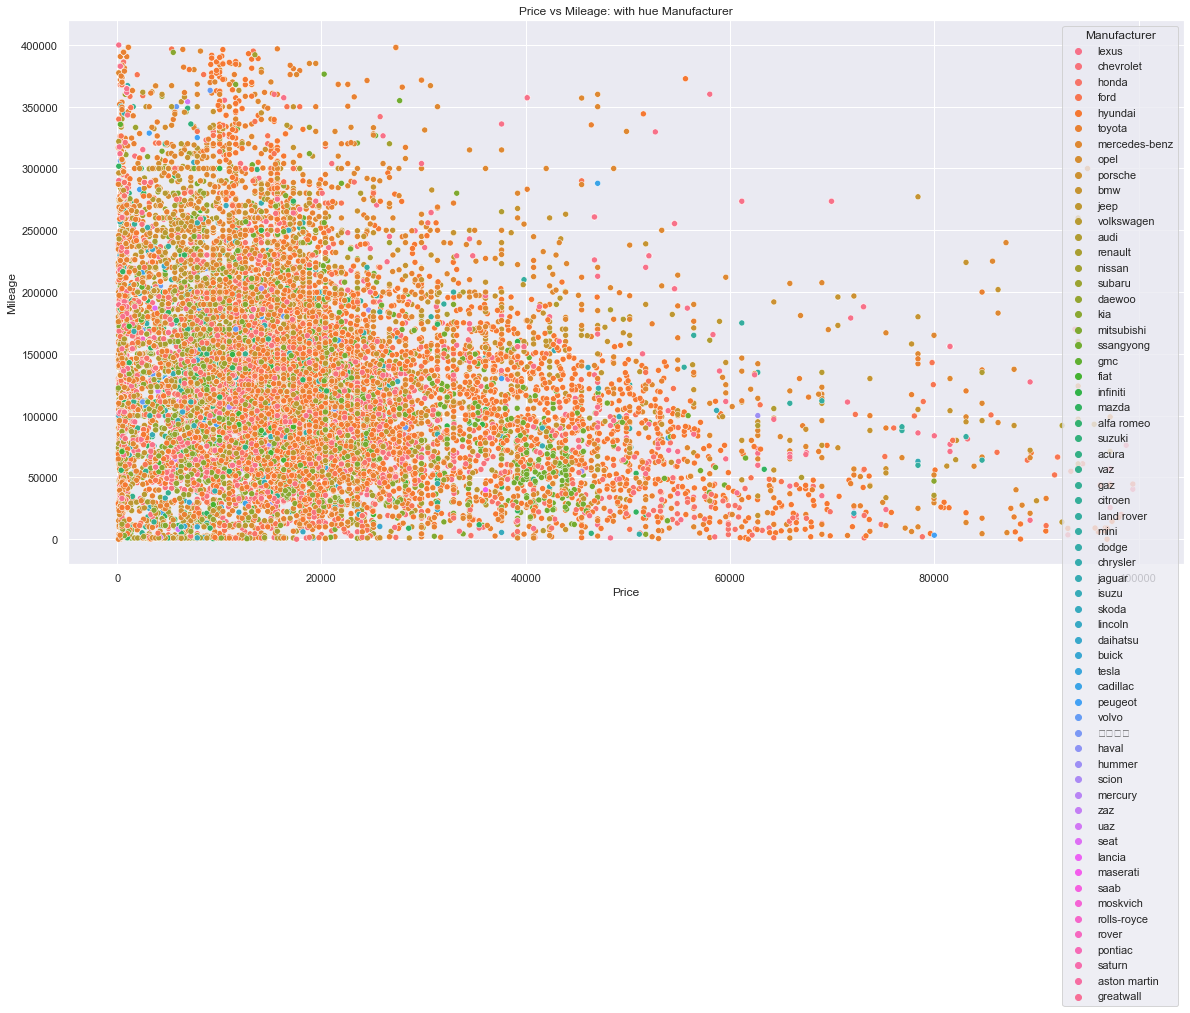

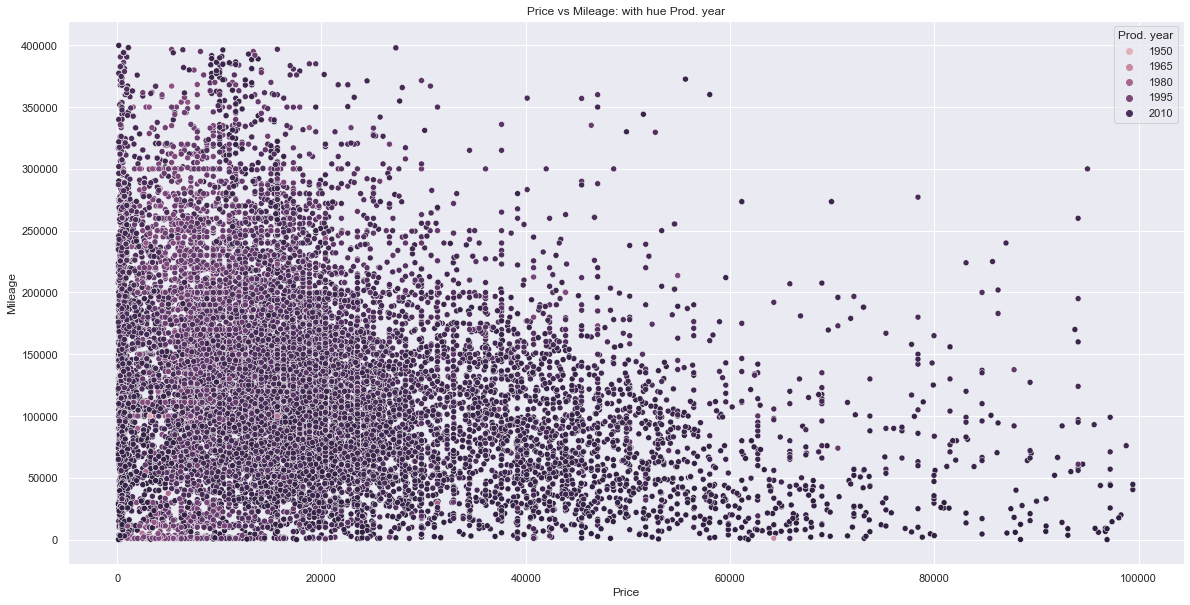

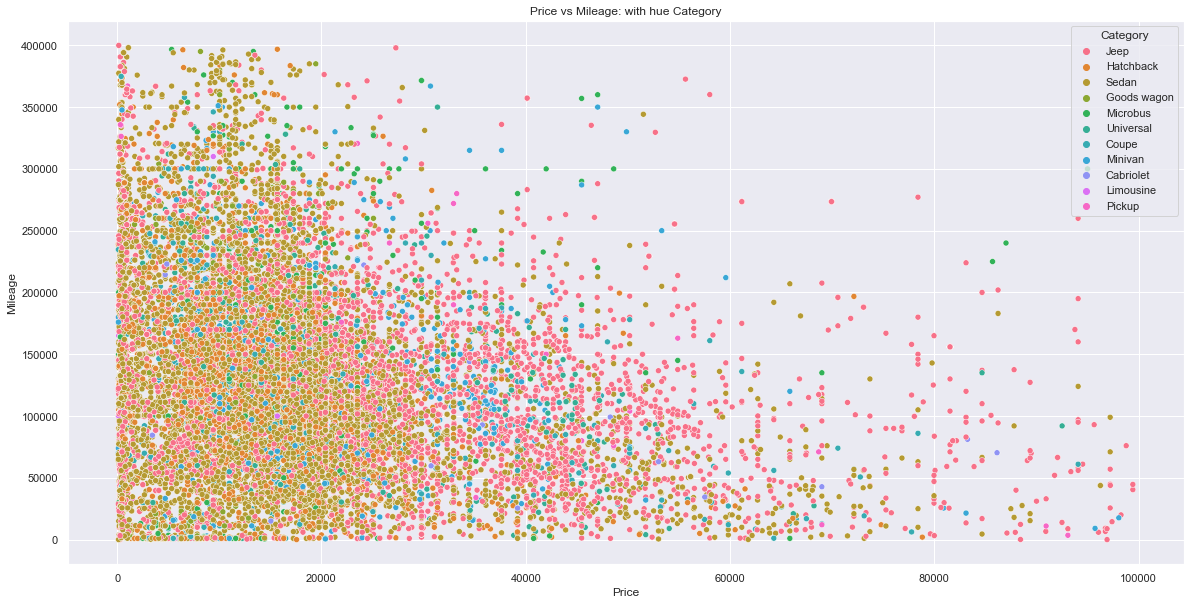

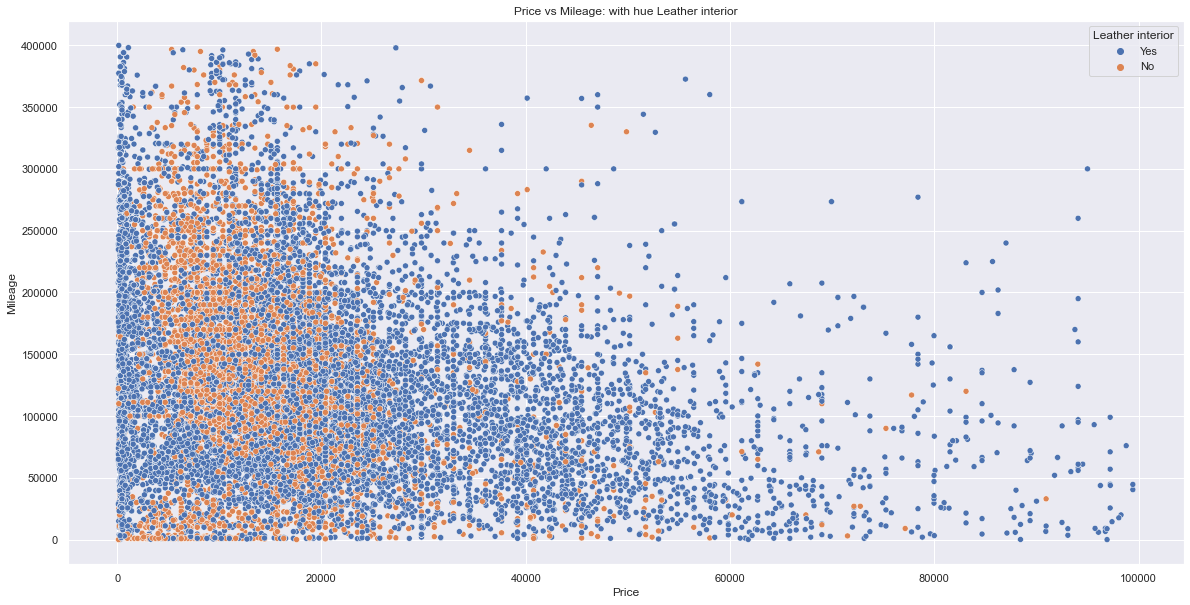

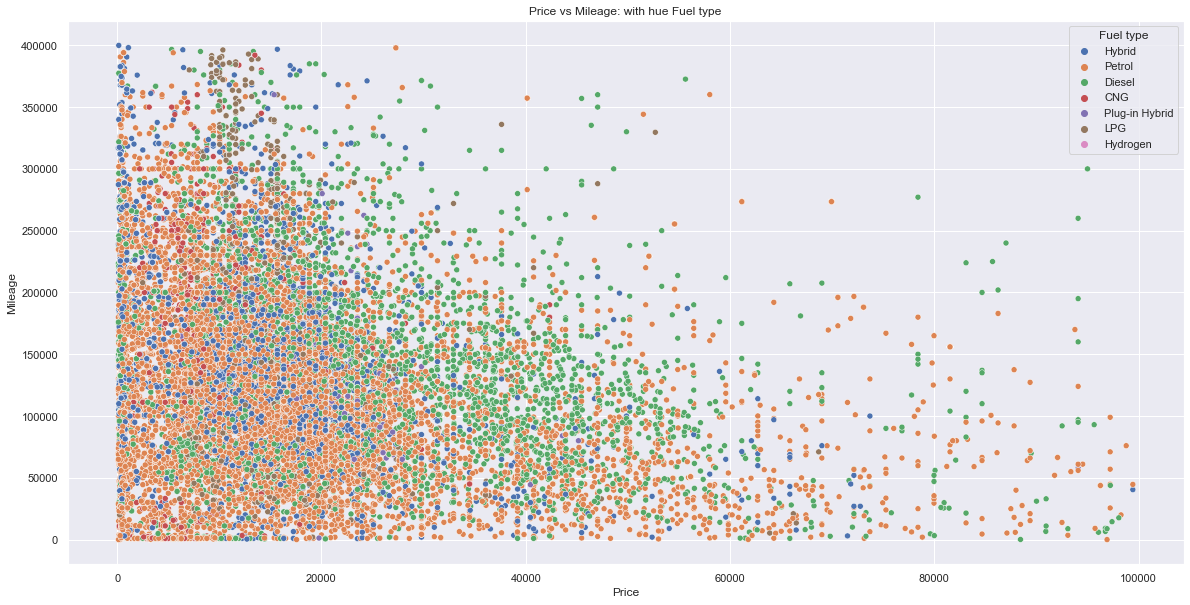

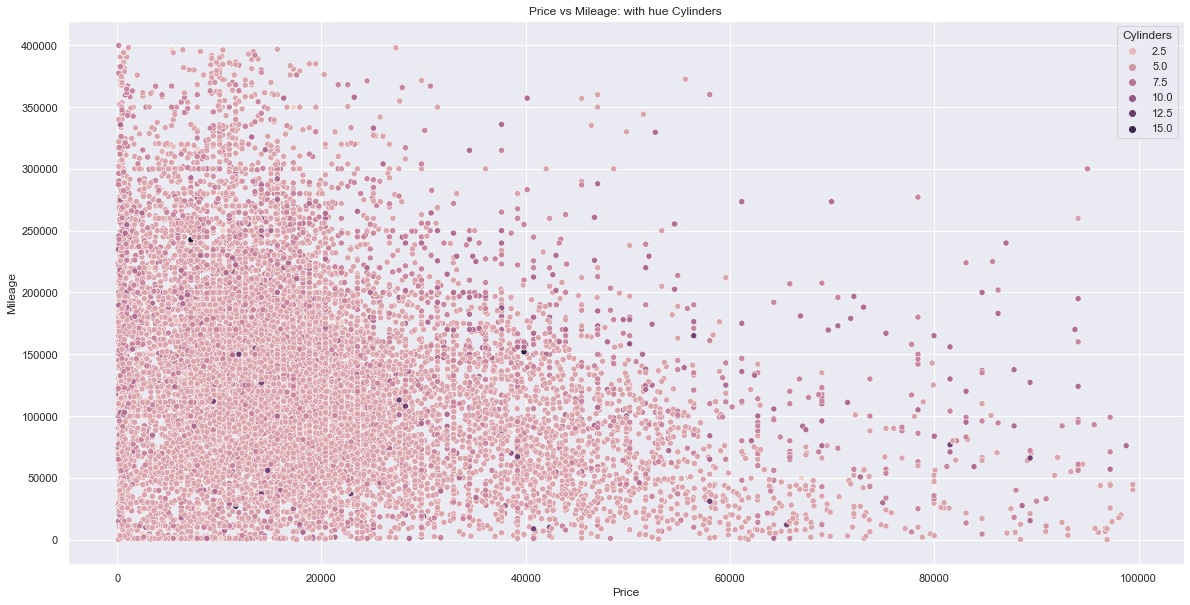

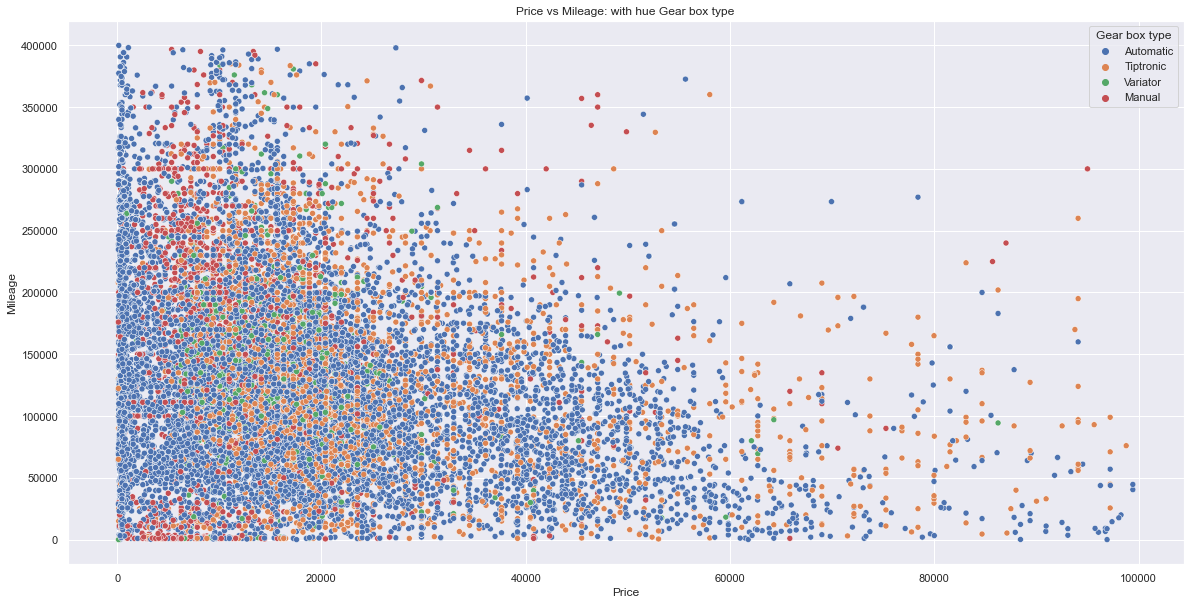

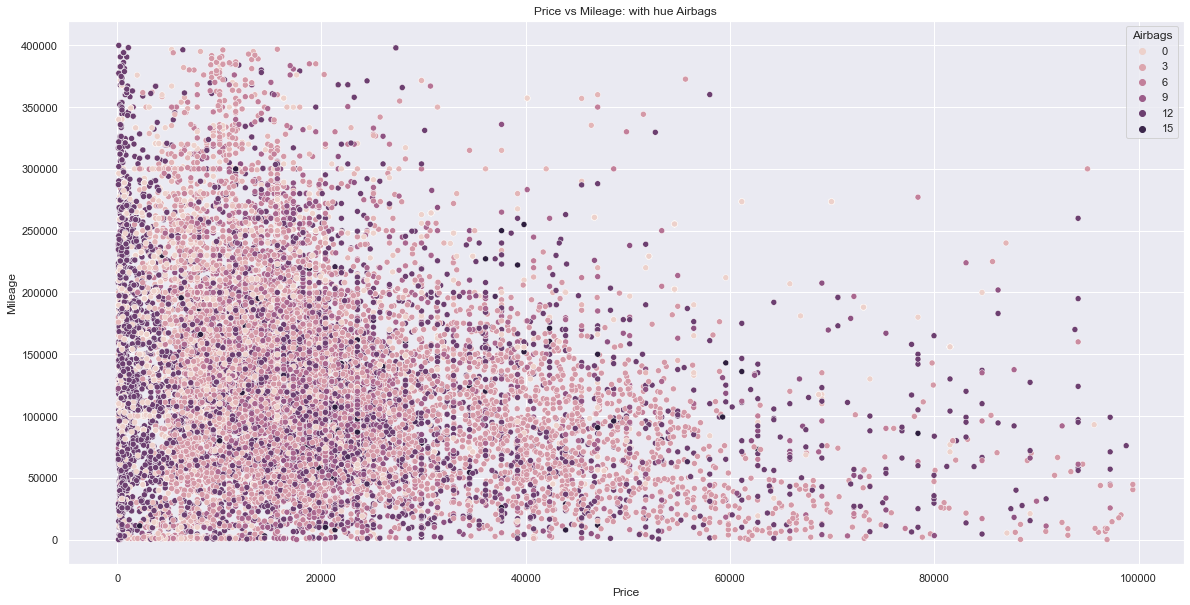

In [30]:
cols = ['Manufacturer', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Cylinders', 'Gear box type', 'Airbags']
sns.set(rc={"figure.figsize":(20, 10)}) 
for i in cols: 
    sns.scatterplot(data=df, x='Price', y='Mileage', hue=i, ).set(title='Price vs Mileage: with hue '+i)
    plt.show()

In [31]:
print(df.columns)
pd.set_option('display.max_rows', 1000)
df.groupby(df['Manufacturer']).count()

Index(['ID', 'Price', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


ID  Price  Model  Prod. year  Category  Leather interior  \
Manufacturer                                                                
acura            11     11     11          11        11                11   
alfa romeo        4      4      4           4         4                 4   
aston martin      1      1      1           1         1                 1   
audi            228    228    228         228       228               228   
bmw             941    941    941         941       941               941   
buick            16     16     16          16        16                16   
cadillac         13     13     13          13        13                13   
chevrolet      1049   1049   1049        1049      1049              1049   
chrysler         22     22     22          22        22                22   
citroen           8      8      8           8         8                 8   
daewoo           91     91     91          91        91                91   
daihatsu         13     13     13          13        13                13   
dodge            82     82     82          82        82                82   
fiat             77     77     77          77        77                77   
ford           1031   1031   1031        1031      1031              1031   
gaz               9      9      9           9         9                 9   
gmc              14     14     14          14        14                14   
greatwall         1      1      1           1         1                 1   
haval             1      1      1           1         1                 1   
honda           845    845    845         845       845               845   
hummer            4      4      4           4         4                 4   
hyundai        3464   3464   3464        3464      3464              3464   
infiniti         28     28     28          28        28                28   
isuzu             4      4      4           4         4                 4   
jaguar           34     34     34          34        34                34   
jeep            133    133    133         133       133               133   
kia             392    392    392         392       392               392   
lancia            1      1      1           1         1                 1   
land rover       38     38     38          38        38                38   
lexus           923    923    923         923       923               923   
lincoln          14     14     14          14        14                14   
maserati          3      3      3           3         3                 3   
mazda           171    171    171         171       171               171   
mercedes-benz  1868   1868   1868        1868      1868              1868   
mercury           4      4      4           4         4                 4   
mini             45     45     45          45        45                45   
mitsubishi      258    258    258         258       258               258   
moskvich          2      2      2           2         2                 2   
nissan          599    599    599         599       599               599   
opel            326    326    326         326       326               326   
peugeot          15     15     15          15        15                15   
pontiac           1      1      1           1         1                 1   
porsche          43     43     43          43        43                43   
renault          36     36     36          36        36                36   
rolls-royce       2      2      2           2         2                 2   
rover             2      2      2           2         2                 2   
saab              2      2      2           2         2                 2   
saturn            1      1      1           1         1                 1   
scion             7      7      7           7         7                 7   
seat              2      2      2           2         2                 2   
skoda        

In [32]:
df.groupby(df['Prod. year']).count()

ID  Price  Manufacturer  Model  Category  Leather interior  \
Prod. year                                                                 
1939           3      3             3      3         3                 3   
1947           1      1             1      1         1                 1   
1953           3      3             3      3         3                 3   
1964           1      1             1      1         1                 1   
1965           2      2             2      2         2                 2   
1973           1      1             1      1         1                 1   
1974           2      2             2      2         2                 2   
1976           1      1             1      1         1                 1   
1977           2      2             2      2         2                 2   
1978           1      1             1      1         1                 1   
1980           1      1             1      1         1                 1   
1981           1      1             1      1         1                 1   
1982           1      1             1      1         1                 1   
1983           2      2             2      2         2                 2   
1984           5      5             5      5         5                 5   
1985           2      2             2      2         2                 2   
1986           5      5             5      5         5                 5   
1987           4      4             4      4         4                 4   
1988           9      9             9      9         9                 9   
1989           5      5             5      5         5                 5   
1990          15     15            15     15        15                15   
1991           6      6             6      6         6                 6   
1992          24     24            24     24        24                24   
1993          18     18            18     18        18                18   
1994          35     35            35     35        35                35   
1995          74     74            74     74        74                74   
1996          89     89            89     89        89                89   
1997         114    114           114    114       114               114   
1998         168    168           168    168       168               168   
1999         172    172           172    172       172               172   
2000         244    244           244    244       244               244   
2001         221    221           221    221       221               221   
2002         261    261           261    261       261               261   
2003         310    310           310    310       310               310   
2004         312    312           312    312       312               312   
2005         333    333           333    333       333               333   
2006         277    277           277    277       277               277   
2007         410    410           410    410       410               410   
2008         664    664           664    664       664               664   
2009         563    563           563    563       563               563   
2010        1424   1424          1424   1424      1424              1424   
2011        1526   1526          1526   1526      1526              1526   
2012        2054   2054          2054   2054      2054              2054   
2013        1865   1865          1865   1865      1865              1865   
2014        1937   1937          1937   1937      1937              1937   
2015        1375   1375          1375   1375      1375              1375   
2016        1376   1376          1376   1376      1376              1376   
2017         904    904           904    904       904               904   
2018         462    462           462    462       462               462   
2019         283    283           283    283       283               283   
2020          41     41            41     41        41        

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Prod. year', ylabel='Density'>

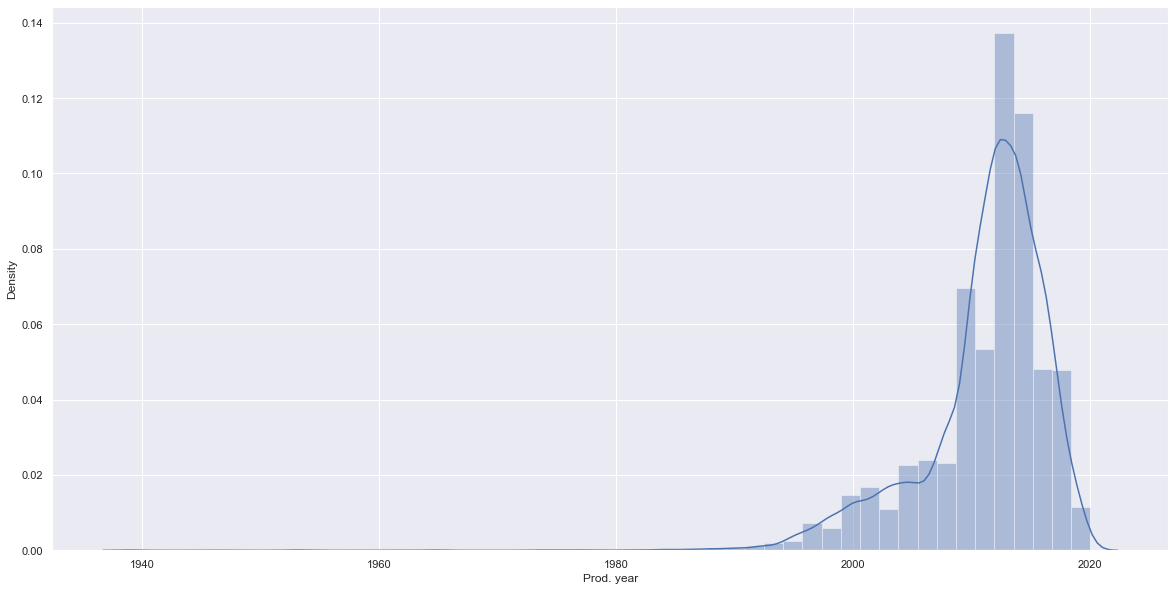

In [33]:
sns.distplot(df['Prod. year'])

In [34]:
#let's remove the outliers
df = df[df['Prod. year']>=1997]

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Prod. year', ylabel='Density'>

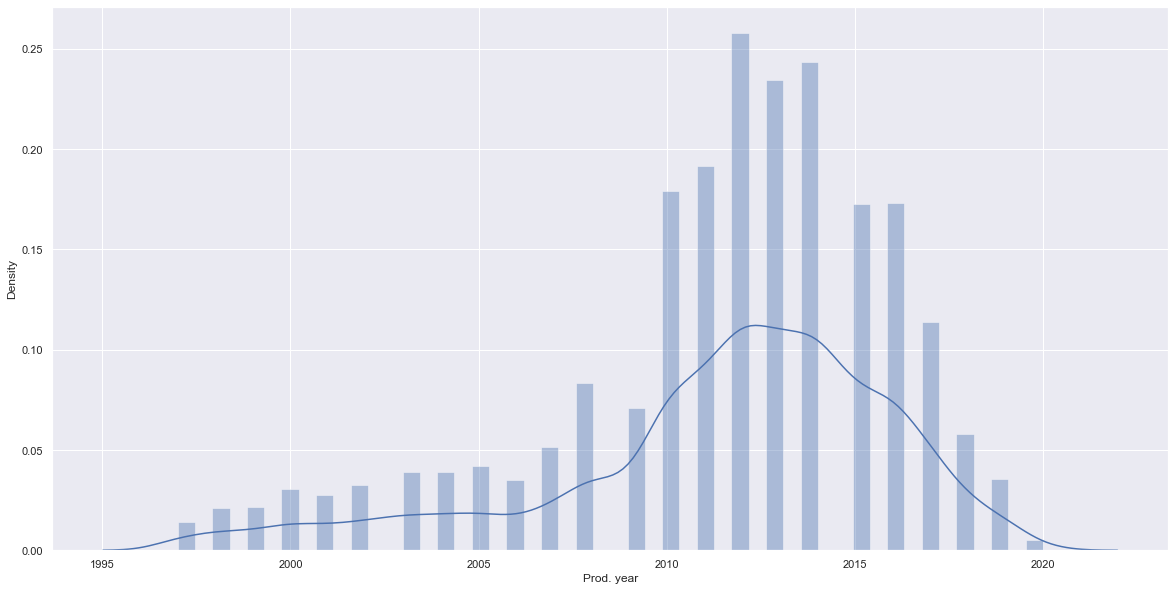

In [35]:
sns.distplot(df['Prod. year'])

In [36]:
len(df)

17296

In [37]:
df.groupby(df['Cylinders']).count()

ID  Price  Manufacturer  Model  Prod. year  Category  \
Cylinders                                                            
1.0           26     26            26     26          26        26   
2.0           31     31            31     31          31        31   
3.0           94     94            94     94          94        94   
4.0        12992  12992         12992  12992       12992     12992   
5.0          150    150           150    150         150       150   
6.0         3079   3079          3079   3079        3079      3079   
7.0            1      1             1      1           1         1   
8.0          877    877           877    877         877       877   
9.0            1      1             1      1           1         1   
10.0          10     10            10     10          10        10   
12.0          29     29            29     29          29        29   
14.0           1      1             1      1           1         1   
16.0           5      5             5      5           5         5   

           Leather interior  Fuel type  Engine volume  Mileage  Gear box type  \
Cylinders                                                                       
1.0                      26         26             26       26             26   
2.0                      31         31             31       31             31   
3.0                      94         94             94       94             94   
4.0                   12992      12992          12992    12992          12992   
5.0                     150        150            150      150            150   
6.0                    3079       3079           3079     3079           3079   
7.0                       1          1              1        1              1   
8.0                     877        877            877      877            877   
9.0                       1          1              1        1              1   
10.0                     10         10             10       10             10   
12.0                     29         29             29       29             29   
14.0                      1          1              1        1              1   
16.0                      5          5              5        5              5   

           Drive wheels  Doors  Wheel  Color  Airbags  
Cylinders                                              
1.0                  26     26     26     26       26  
2.0                  31     31     31     31       31  
3.0                  94     94     94     94       94  
4.0               12992  12992  12992  12992    12992  
5.0                 150    150    150    150      150  
6.0                3079   3079   3079   3079     3079  
7.0                   1      1      1      1        1  
8.0                 877    877    877    877      877  
9.0                   1      1      1      1        1  
10.0                 10     10     10     10       10  
12.0                 29     29     29     29       29  
14.0                  1      1      1      1        1  
16.0                  5      5      5      5        5

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cylinders', ylabel='count'>

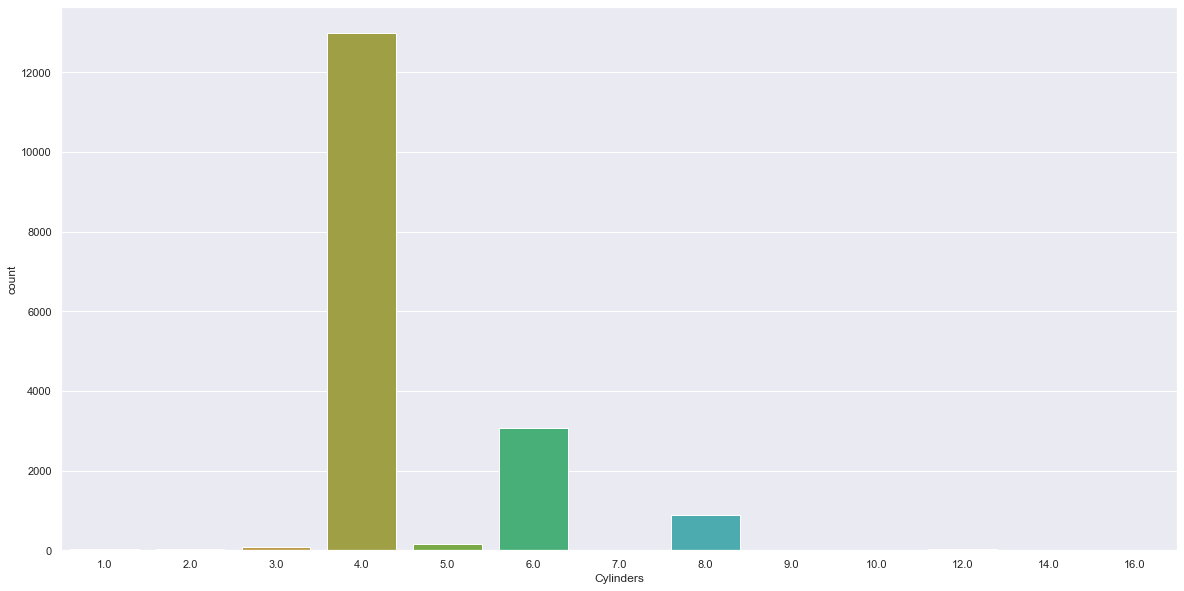

In [38]:
sns.countplot(df['Cylinders'])

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Doors', ylabel='count'>

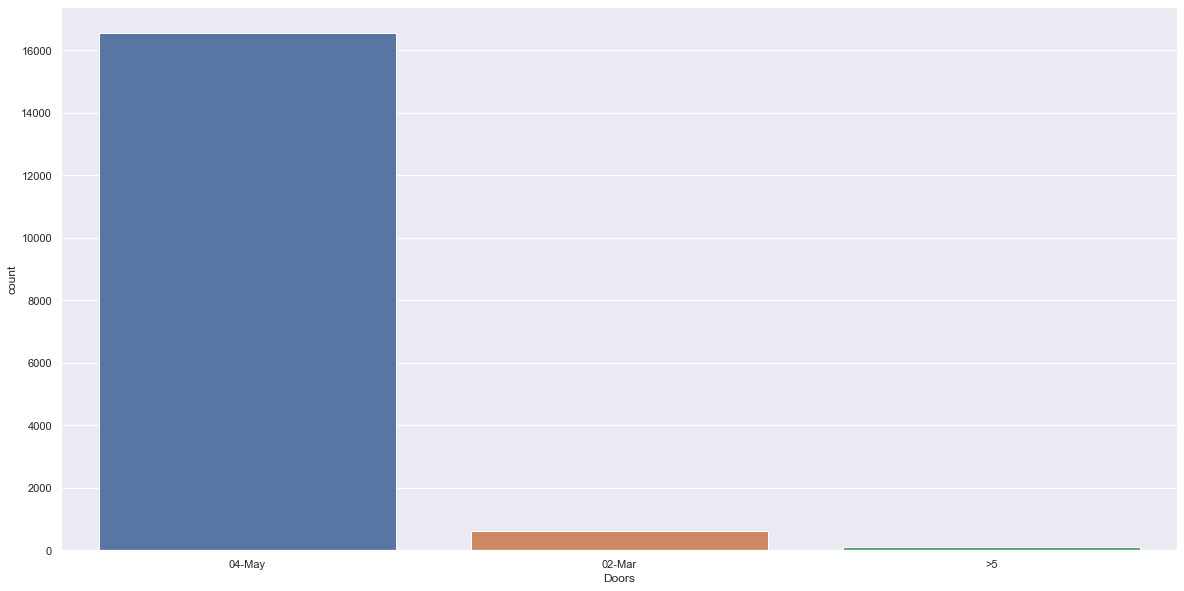

In [39]:
sns.countplot(df['Doors'])

In [40]:
def clean_doors(x):
    return re.findall("\d+", x)[0]
    
df['Doors'] = df['Doors'].apply(clean_doors)

In [41]:
df['Doors'] = df['Doors'].astype(int)

In [42]:
#Create dummies
df.drop('ID', axis=1, inplace=True)

In [43]:
df.head()

Price Manufacturer    Model  Prod. year   Category Leather interior  \
0  13328        lexus   rx 450        2010       Jeep              Yes   
1  16621    chevrolet  equinox        2011       Jeep               No   
2   8467        honda      fit        2006  Hatchback               No   
3   3607         ford   escape        2011       Jeep              Yes   
4  11726        honda      fit        2014  Hatchback              Yes   

  Fuel type Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
0    Hybrid           3.5   186005        6.0     Automatic          4x4   
1    Petrol             3   192000        6.0     Tiptronic          4x4   
2    Petrol           1.3   200000        4.0      Variator        Front   
3    Hybrid           2.5   168966        4.0     Automatic          4x4   
4    Petrol           1.3    91901        4.0     Automatic        Front   

   Doors             Wheel   Color  Airbags  
0      4        Left wheel  Silver       12  
1      4        Left wheel   Black        8  
2      4  Right-hand drive   Black        2  
3      4        Left wheel   White        0  
4      4        Left wheel  Silver        4

In [44]:
df['Engine volume']

0              3.5
1                3
2              1.3
3              2.5
4              1.3
           ...    
19232    2.0 Turbo
19233          2.4
19234            2
19235            2
19236          2.4
Name: Engine volume, Length: 17296, dtype: object

In [45]:
df.columns[1:]

Index(['Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags'],
      dtype='object')

In [46]:
df.Manufacturer

0                lexus
1            chevrolet
2                honda
3                 ford
4                honda
             ...      
19232    mercedes-benz
19233          hyundai
19234          hyundai
19235        chevrolet
19236          hyundai
Name: Manufacturer, Length: 17296, dtype: object

In [47]:
df.head()

Price Manufacturer    Model  Prod. year   Category Leather interior  \
0  13328        lexus   rx 450        2010       Jeep              Yes   
1  16621    chevrolet  equinox        2011       Jeep               No   
2   8467        honda      fit        2006  Hatchback               No   
3   3607         ford   escape        2011       Jeep              Yes   
4  11726        honda      fit        2014  Hatchback              Yes   

  Fuel type Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
0    Hybrid           3.5   186005        6.0     Automatic          4x4   
1    Petrol             3   192000        6.0     Tiptronic          4x4   
2    Petrol           1.3   200000        4.0      Variator        Front   
3    Hybrid           2.5   168966        4.0     Automatic          4x4   
4    Petrol           1.3    91901        4.0     Automatic        Front   

   Doors             Wheel   Color  Airbags  
0      4        Left wheel  Silver       12  
1      4        Left wheel   Black        8  
2      4  Right-hand drive   Black        2  
3      4        Left wheel   White        0  
4      4        Left wheel  Silver        4

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17296 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17296 non-null  int64  
 1   Manufacturer      17296 non-null  object 
 2   Model             17296 non-null  object 
 3   Prod. year        17296 non-null  int64  
 4   Category          17296 non-null  object 
 5   Leather interior  17296 non-null  object 
 6   Fuel type         17296 non-null  object 
 7   Engine volume     17296 non-null  object 
 8   Mileage           17296 non-null  int64  
 9   Cylinders         17296 non-null  float64
 10  Gear box type     17296 non-null  object 
 11  Drive wheels      17296 non-null  object 
 12  Doors             17296 non-null  int32  
 13  Wheel             17296 non-null  object 
 14  Color             17296 non-null  object 
 15  Airbags           17296 non-null  int64  
dtypes: float64(1), int32(1), int64(4), objec

In [49]:
categorical = []
for col in df.columns: 
    if df[col].dtypes == 'object': 
        df[col].str.lower()

df['Prod. year'] = df['Prod. year'].astype('object')
df['Doors'] = df['Doors'].astype('object')
df['Cylinders'] = df['Cylinders'].astype('object')
df['Airbags'] = df['Airbags'].astype('object')

for col in df.columns: 
    if df[col].dtypes == 'object': 
        categorical.append(col)

In [50]:
#Converting catgorical data to dummies
X1 = pd.get_dummies(df[categorical], drop_first=True)
numerical = []
for col in df.columns: 
    if col == 'Price': 
        pass
    elif df[col].dtype != 'object': 
        numerical.append(col)
X2 = df[numerical]

In [51]:
X = pd.concat([X2,X1], axis = 1)

In [52]:
X

Mileage  Manufacturer_alfa romeo  Manufacturer_aston martin  \
0       186005                        0                          0   
1       192000                        0                          0   
2       200000                        0                          0   
3       168966                        0                          0   
4        91901                        0                          0   
...        ...                      ...                        ...   
19232   300000                        0                          0   
19233   161600                        0                          0   
19234   116365                        0                          0   
19235    51258                        0                          0   
19236   186923                        0                          0   

       Manufacturer_audi  Manufacturer_bmw  Manufacturer_buick  \
0                      0                 0                   0   
1                      0                 0                   0   
2                      0                 0                   0   
3                      0                 0                   0   
4                      0                 0                   0   
...                  ...               ...                 ...   
19232                  0                 0                   0   
19233                  0                 0                   0   
19234                  0                 0                   0   
19235                  0                 0                   0   
19236                  0                 0                   0   

       Manufacturer_cadillac  Manufacturer_chevrolet  Manufacturer_chrysler  \
0                          0                       0                      0   
1                          0                       1                      0   
2                          0                       0                      0   
3                          0                       0                      0   
4                          0                       0                      0   
...                      ...                     ...                    ...   
19232                      0                       0                      0   
19233                      0                       0                      0   
19234                      0                       0                      0   
19235                      0                       1                      0   
19236                      0                       0                      0   

       Manufacturer_citroen  ...  Airbags_7  Airbags_8  Airbags_9  Airbags_10  \
0                         0  ...          0          0          0           0   
1                         0  ...          0          1          0           0   
2                         0  ...          0          0          0           0   
3                         0  ...          0          0          0           0   
4                         0  ...          0          0          0           0   
...                     ...  ...        ...        ...        ...         ...   
19232                     0  ...          0          0          0           0   
19233                     0  ...          0          1          0           0   
19234                     0  ...          0          0          0           0   
19235                     0  ...          0          0          0           0   
19236                     0  ...          0          0          0           0   

       Airbags_11  Airbags_12  Airbags_13  Airbags_14  Airbags_15  Airbags_16  
0               0           1           0           0           0           0  
1               0           0           0           0           0           0  
2               0           0           0           0           0           0  
3               0           0           0           0           0           0  
4               0           0           0          

In [53]:
X = X.values

In [54]:
X

array([[186005,      0,      0, ...,      0,      0,      0],
       [192000,      0,      0, ...,      0,      0,      0],
       [200000,      0,      0, ...,      0,      0,      0],
       ...,
       [116365,      0,      0, ...,      0,      0,      0],
       [ 51258,      0,      0, ...,      0,      0,      0],
       [186923,      0,      0, ...,      0,      0,      0]], dtype=int64)

In [55]:
numerical

['Mileage']

In [56]:
Y = df['Price']

<AxesSubplot:xlabel='Price', ylabel='Count'>

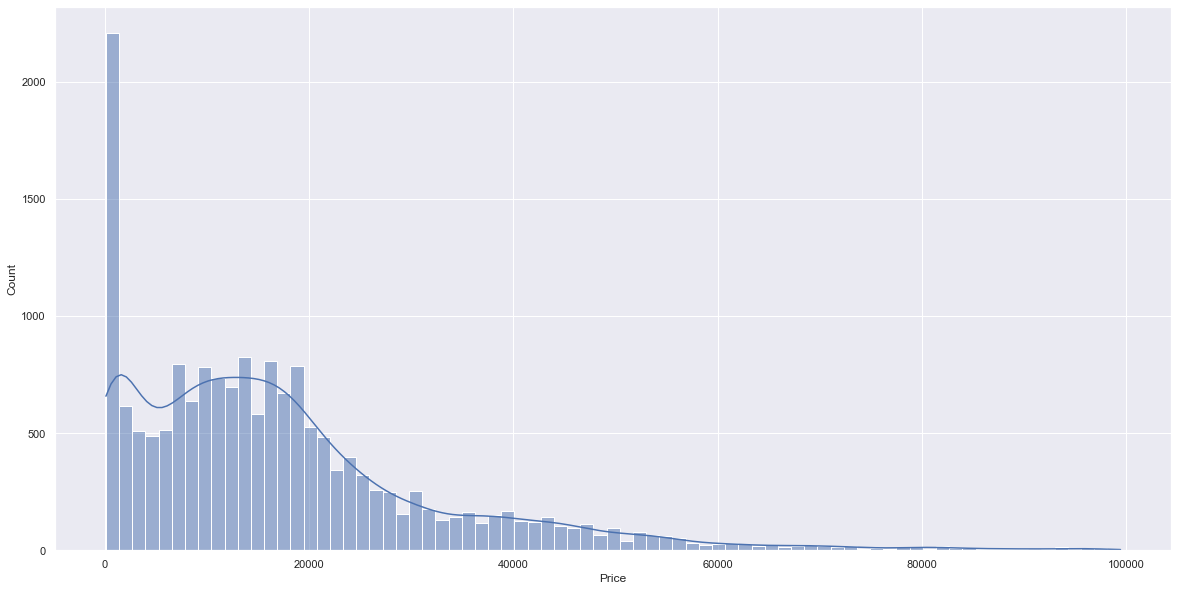

In [57]:
sns.histplot(data = df, x = 'Price', kde=True)

In [58]:
#Not normal distribution
Y=np.log(Y)
Y=Y.values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=1)

In [60]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[:, :(len(X1.columns))]= sc.fit_transform(X_train[:, :(len(X1.columns))])
X_test[:, :(len(X1.columns))]= sc.transform(X_test[:, :(len(X1.columns))])

In [61]:
#Import regression models and metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#Regression Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#import xgboost as xgb
#from lightgbm import LGBMRegressor

#Linear regression
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print( 'R2_Score: ', round(r2_score(Y_test, Y_pred),4))
print("RMSE: ",round(mean_squared_error(np.exp(Y_test),np.exp(Y_pred), squared=False), 2))
print("MSE: ", round(mean_absolute_error(np.exp(Y_test),np.exp(Y_pred)), 2))

#Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print( 'R2_Score: ', round(r2_score(Y_test, Y_pred),4))
print("RMSE: ",round(mean_squared_error(np.exp(Y_test),np.exp(Y_pred), squared=False), 2))
print("MSE: ", round(mean_absolute_error(np.exp(Y_test),np.exp(Y_pred)), 2))

R2_Score:  -8.90658282660111e+25


<ipython-input-61-d223e60e8b7b>:18: RuntimeWarning: overflow encountered in exp
  print("RMSE: ",round(mean_squared_error(np.exp(Y_test),np.exp(Y_pred), squared=False), 2))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [62]:
#Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)
Y_pred = rf_reg.predict(X_test)
print( 'R2_Score: ', round(r2_score(Y_test, Y_pred),4))
print("RMSE: ",round(mean_squared_error(np.exp(Y_test),np.exp(Y_pred), squared=False), 2))
print("MSE: ", round(mean_absolute_error(np.exp(Y_test),np.exp(Y_pred)), 2))

R2_Score:  0.7239
RMSE:  8768.71
MSE:  4607.03


In [63]:
#Lasso regression
lasso = Lasso(alpha=0.005)
lasso.fit(X_train, Y_train)
Y_pred = lasso.predict(X_test)
print( 'R2_Score: ', round(r2_score(Y_test, Y_pred),4))
print("RMSE: ",round(mean_squared_error(np.exp(Y_test),np.exp(Y_pred), squared=False), 2))
print("MSE: ", round(mean_absolute_error(np.exp(Y_test),np.exp(Y_pred)), 2))

R2_Score:  0.4434
RMSE:  13686.35
MSE:  8341.7


In [64]:
#Ridge regression
ridge = Ridge(alpha=0.005)
ridge.fit(X_train, Y_train)
Y_pred = ridge.predict(X_test)
print( 'R2_Score: ', round(r2_score(Y_test, Y_pred),4))
print("RMSE: ",round(mean_squared_error(np.exp(Y_test),np.exp(Y_pred), squared=False), 2))
print("MSE: ", round(mean_absolute_error(np.exp(Y_test),np.exp(Y_pred)), 2))

R2_Score:  0.4217
RMSE:  16491.07
MSE:  8898.82


In [ ]:
#dummyfy = df.columns[1:]
#print(dummyfy)
#dummy_df = pd.DataFrame(df['Price'])
#for dum in dummyfy: 
#    print(dum)
#    dummy_atm = pd.get_dummies(df[dum], drop_first=False, prefix=dum, dtype=int)
#    dummy_df = pd.concat([dummy_df, dummy_atm], axis = 1)
#dummy_df.head()


In [ ]:
dummy_df.columns

NameError: name 'dummy_df' is not defined

In [ ]:
dummy_df['Manufacturer_acura']

0        0
1        0
2        0
3        0
4        0
        ..
19232    0
19233    0
19234    0
19235    0
19236    0
Name: Manufacturer_acura, Length: 17296, dtype: int32

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.corr()

Price  Prod. year   Mileage  Cylinders     Doors   Airbags
Price       1.000000    0.301910 -0.263884   0.032196  0.023742 -0.100088
Prod. year  0.301910    1.000000 -0.364145  -0.168478  0.153913  0.164732
Mileage    -0.263884   -0.364145  1.000000   0.202929 -0.010185 -0.017791
Cylinders   0.032196   -0.168478  0.202929   1.000000 -0.041111  0.154249
Doors       0.023742    0.153913 -0.010185  -0.041111  1.000000  0.025378
Airbags    -0.100088    0.164732 -0.017791   0.154249  0.025378  1.000000

In [ ]:
#Not very good result, let's try a simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [ ]:
df.columns

Index(['Price', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
#Remove unfrequent data
threshold = 150 # Anything that occurs less than this will be removed.
df_cols = df.drop(['Mileage','Price','Model'], axis=1).columns
print(df_cols)
for col in df_cols:
    value_counts = df[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    df[col].replace(to_remove, np.nan, inplace=True)

Index(['Manufacturer', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags'],
      dtype='object')


In [ ]:
len(df)

17296

In [ ]:
df.groupby('Model').count()

Price  Manufacturer  Prod. year  Category  Leather interior  \
Model                                                                    
09-mar         2             0           2         2                 2   
100            2             2           2         2                 2   
100 nx         1             1           1         1                 1   
1000          16            16          16        16                16   
114            1             1           1         1                 1   
...          ...           ...         ...       ...               ...   
yukon          2             0           2         2                 2   
z4             1             1           1         0                 1   
z4 3,0 si      1             1           1         1                 1   
zafira        27            27          27        27                27   
zafira b       1             1           1         1                 1   

           Fuel type  Engine volume  Mileage  Cylinders  Gear box type  \
Model                                                                    
09-mar             2              2        2          2              2   
100                2              2        2          2              2   
100 nx             1              1        1          1              1   
1000              16             16       16         16             16   
114                1              1        1          1              1   
...              ...            ...      ...        ...            ...   
yukon              2              0        2          2              2   
z4                 1              1        1          1              1   
z4 3,0 si          1              1        1          1              1   
zafira            27             22       27         27             27   
zafira b           1              0        1          1              1   

           Drive wheels  Doors  Wheel  Color  Airbags  
Model                                                  
09-mar                2      2      2      2        2  
100                   2      2      2      2        2  
100 nx                1      1      1      1        1  
1000                 16     16     16     16       16  
114                   1      1      1      1        1  
...                 ...    ...    ...    ...      ...  
yukon                 2      2      2      2        2  
z4                    1      1      1      1        1  
z4 3,0 si             1      1      1      1        1  
zafira               27     27     27     27       27  
zafira b              1      1      1      1        1  

[1372 rows x 15 columns]

In [ ]:
df.dropna()

Price   Manufacturer    Model  Prod. year   Category Leather interior  \
0      13328          lexus   rx 450      2010.0       Jeep              Yes   
1      16621      chevrolet  equinox      2011.0       Jeep               No   
2       8467          honda      fit      2006.0  Hatchback               No   
3       3607           ford   escape      2011.0       Jeep              Yes   
4      11726          honda      fit      2014.0  Hatchback              Yes   
...      ...            ...      ...         ...        ...              ...   
19231   5802  mercedes-benz    e 350      2013.0      Sedan              Yes   
19233  15681        hyundai   sonata      2011.0      Sedan              Yes   
19234  26108        hyundai   tucson      2010.0       Jeep              Yes   
19235   5331      chevrolet  captiva      2007.0       Jeep              Yes   
19236    470        hyundai   sonata      2012.0      Sedan              Yes   

      Fuel type Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
0        Hybrid           3.5   186005        6.0     Automatic          4x4   
1        Petrol             3   192000        6.0     Tiptronic          4x4   
2        Petrol           1.3   200000        4.0      Variator        Front   
3        Hybrid           2.5   168966        4.0     Automatic          4x4   
4        Petrol           1.3    91901        4.0     Automatic        Front   
...         ...           ...      ...        ...           ...          ...   
19231    Diesel           3.5   107800        6.0     Automatic         Rear   
19233    Petrol           2.4   161600        4.0     Tiptronic        Front   
19234    Diesel             2   116365        4.0     Automatic        Front   
19235    Diesel             2    51258        4.0     Automatic        Front   
19236    Hybrid           2.4   186923        4.0     Automatic        Front   

       Doors             Wheel   Color  Airbags  
0          4        Left wheel  Silver     12.0  
1          4        Left wheel   Black      8.0  
2          4  Right-hand drive   Black      2.0  
3          4        Left wheel   White      0.0  
4          4        Left wheel  Silver      4.0  
...      ...               ...     ...      ...  
19231      4        Left wheel    Grey     12.0  
19233      4        Left wheel     Red      8.0  
19234      4        Left wheel    Grey      4.0  
19235      4        Left wheel   Black      4.0  
19236      4        Left wheel   White     12.0  

[13281 rows x 16 columns]

C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Manufacturer', ylabel='count'>

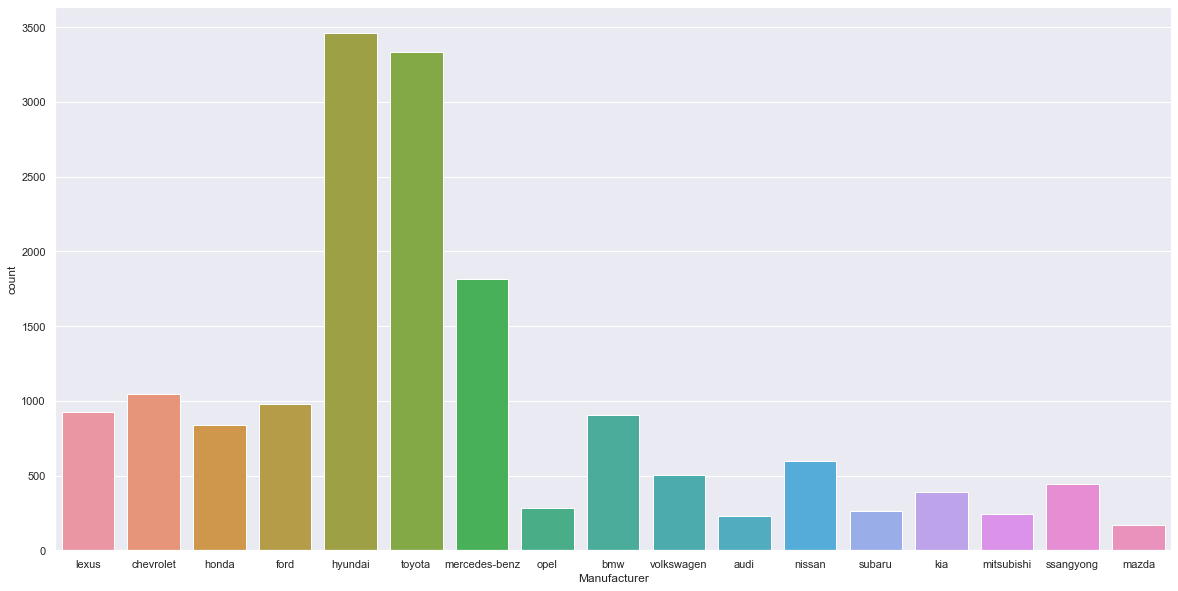

In [ ]:
sns.countplot(df['Manufacturer'])

In [ ]:
ohe = OneHotEncoder()
ohe.fit(df[['Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags']])

OneHotEncoder()

In [ ]:
ohe.categories_

[array(['audi', 'bmw', 'chevrolet', 'ford', 'honda', 'hyundai', 'kia',
        'lexus', 'mazda', 'mercedes-benz', 'mitsubishi', 'nissan', 'opel',
        'ssangyong', 'subaru', 'toyota', 'volkswagen', nan], dtype=object),
 array(['09-mar', '100', '100 nx', ..., 'z4 3,0 si', 'zafira', 'zafira b'],
       dtype=object),
 array([1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
        2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
        2016., 2017., 2018., 2019.,   nan]),
 array(['Coupe', 'Goods wagon', 'Hatchback', 'Jeep', 'Microbus', 'Minivan',
        'Sedan', 'Universal', nan], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['CNG', 'Diesel', 'Hybrid', 'LPG', 'Petrol', nan], dtype=object),
 array(['1.3', '1.4', '1.4 Turbo', '1.5', '1.6', '1.8', '1.8 Turbo', '2',
        '2.0 Turbo', '2.2', '2.2 Turbo', '2.4', '2.5', '3', '3.0 Turbo',
        '3.3', '3.5', '4.6', nan], dtype=object),
 array([    13,     18,     21, ..., 397915, 398069, 399906

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags']),
                                        remainder='passthrough')

In [ ]:
lr = LinearRegression()

In [ ]:
pip = make_pipeline(column_trans, lr)

<AxesSubplot:>

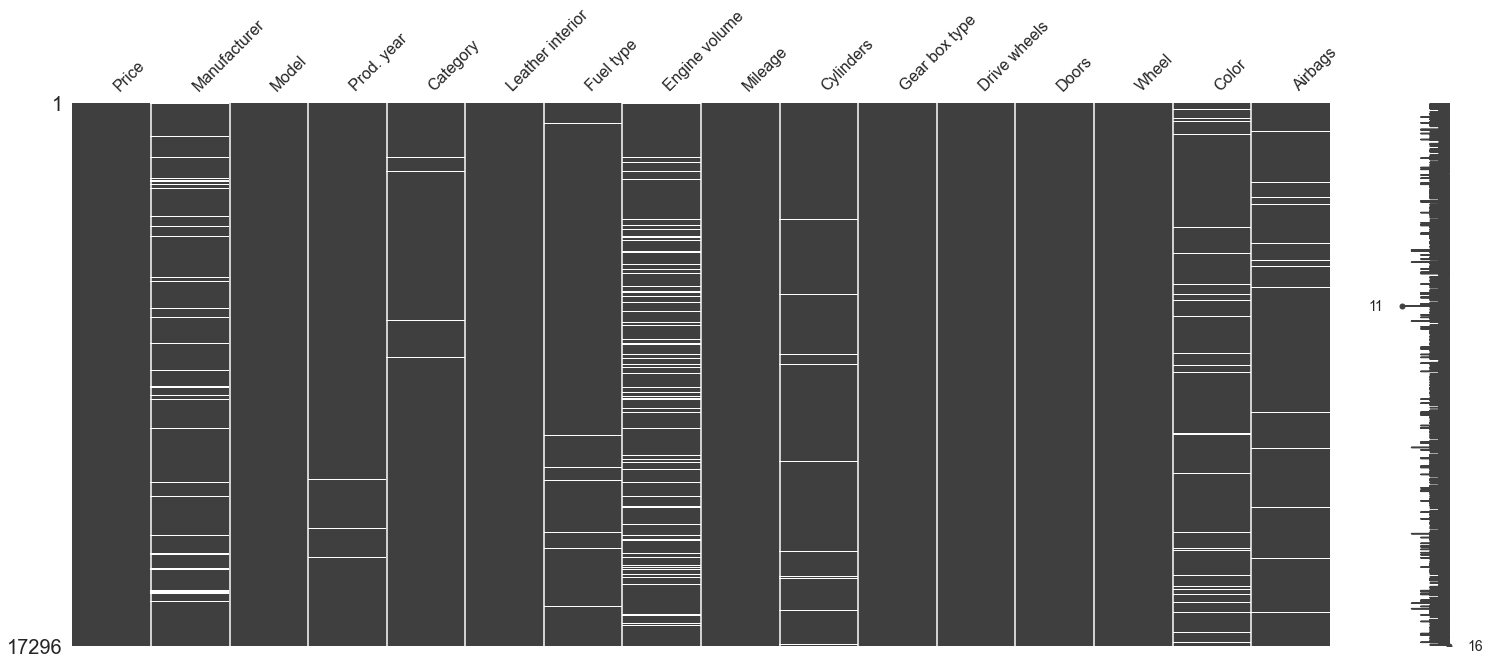

In [ ]:
msno.matrix(df)

In [ ]:
df.dropna()

Price   Manufacturer    Model  Prod. year   Category Leather interior  \
0      13328          lexus   rx 450      2010.0       Jeep              Yes   
1      16621      chevrolet  equinox      2011.0       Jeep               No   
2       8467          honda      fit      2006.0  Hatchback               No   
3       3607           ford   escape      2011.0       Jeep              Yes   
4      11726          honda      fit      2014.0  Hatchback              Yes   
...      ...            ...      ...         ...        ...              ...   
19231   5802  mercedes-benz    e 350      2013.0      Sedan              Yes   
19233  15681        hyundai   sonata      2011.0      Sedan              Yes   
19234  26108        hyundai   tucson      2010.0       Jeep              Yes   
19235   5331      chevrolet  captiva      2007.0       Jeep              Yes   
19236    470        hyundai   sonata      2012.0      Sedan              Yes   

      Fuel type Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
0        Hybrid           3.5   186005        6.0     Automatic          4x4   
1        Petrol             3   192000        6.0     Tiptronic          4x4   
2        Petrol           1.3   200000        4.0      Variator        Front   
3        Hybrid           2.5   168966        4.0     Automatic          4x4   
4        Petrol           1.3    91901        4.0     Automatic        Front   
...         ...           ...      ...        ...           ...          ...   
19231    Diesel           3.5   107800        6.0     Automatic         Rear   
19233    Petrol           2.4   161600        4.0     Tiptronic        Front   
19234    Diesel             2   116365        4.0     Automatic        Front   
19235    Diesel             2    51258        4.0     Automatic        Front   
19236    Hybrid           2.4   186923        4.0     Automatic        Front   

       Doors             Wheel   Color  Airbags  
0          4        Left wheel  Silver     12.0  
1          4        Left wheel   Black      8.0  
2          4  Right-hand drive   Black      2.0  
3          4        Left wheel   White      0.0  
4          4        Left wheel  Silver      4.0  
...      ...               ...     ...      ...  
19231      4        Left wheel    Grey     12.0  
19233      4        Left wheel     Red      8.0  
19234      4        Left wheel    Grey      4.0  
19235      4        Left wheel   Black      4.0  
19236      4        Left wheel   White     12.0  

[13281 rows x 16 columns]

<AxesSubplot:>

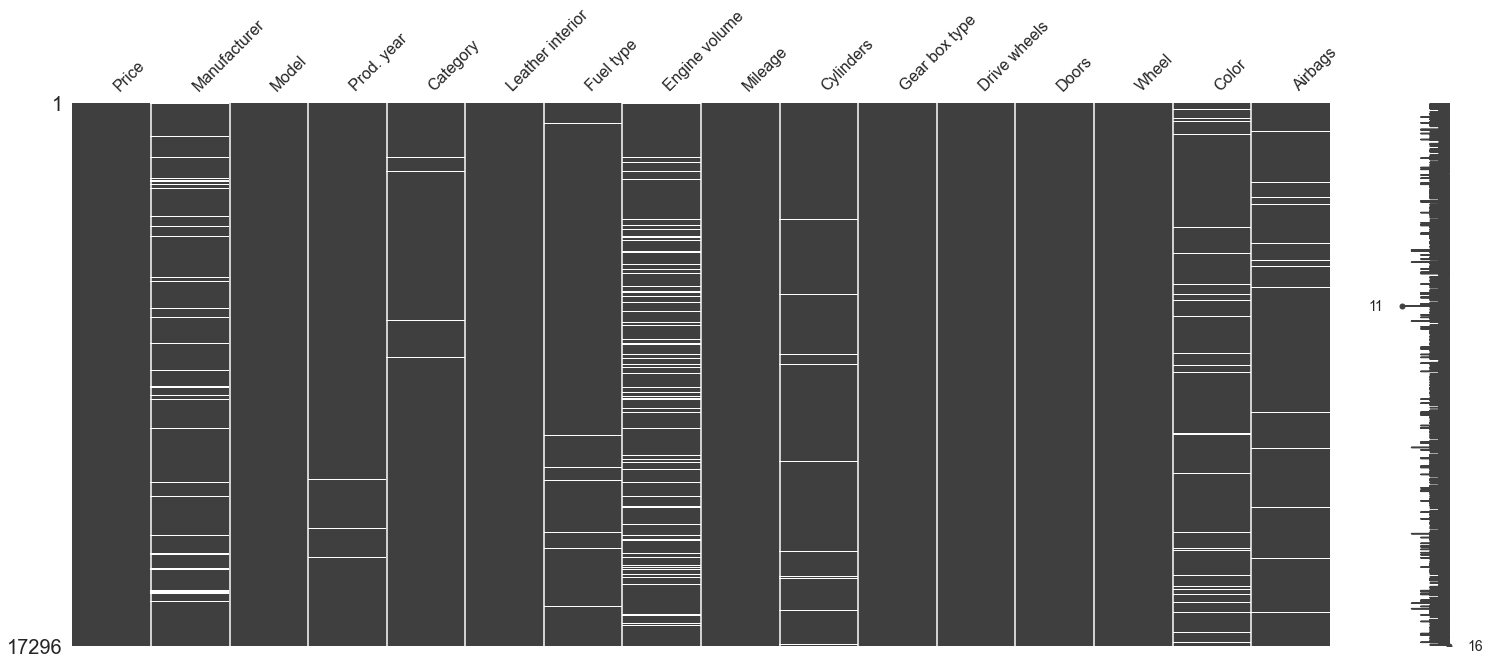

In [ ]:
msno.matrix(df)

In [ ]:
df.corr()

Price  Prod. year   Mileage  Cylinders     Doors   Airbags
Price       1.000000    0.301910 -0.263884   0.032196  0.023742 -0.100088
Prod. year  0.301910    1.000000 -0.364145  -0.168478  0.153913  0.164732
Mileage    -0.263884   -0.364145  1.000000   0.202929 -0.010185 -0.017791
Cylinders   0.032196   -0.168478  0.202929   1.000000 -0.041111  0.154249
Doors       0.023742    0.153913 -0.010185  -0.041111  1.000000  0.025378
Airbags    -0.100088    0.164732 -0.017791   0.154249  0.025378  1.000000

In [ ]:
X = df.drop(['Price'],axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
pip.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['audi', 'bmw', 'chevrolet', 'ford', 'honda', 'hyundai', 'kia',
       'lexus', 'mazda', 'mercedes-benz', 'mitsubishi', 'nissan', 'opel',
       'ssangyong', 'subaru', 'toyota', 'volkswagen', nan], dtype=object),
                                                                            array(['09-mar', '100', '100 nx...
                                                                            array(['Left wheel', 'Right-hand drive'], dtype=object),
                                                                            array(['Black', 'Blue', 'Brown', 'Green', 'Grey', 'Red', 'Silver',
       'White', nan], dtype=object),
                                                                            array([ 0.,  2.,  4.,  6.,  8., 10., 12.

In [ ]:
y_pred = pip.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.5154541739721997

In [ ]:
best = []
for i in range(1000): 
    if i == 250: 
        print('1/4 of the way')
    elif i == 500: 
        print('Halfway there')
    elif i == 750: 
        print('3/4 of the way')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    lr = LinearRegression()
    pip = make_pipeline(column_trans, lr)
    pip.fit(X_train, y_train)
    y_pred = pip.predict(X_test)
    print(r2_score(y_test, y_pred))
    best.append(r2_score(y_test, y_pred))

0.5143339426871845
0.4919954991222075
0.4868154826240473
0.511735096637888
0.49076279186474936
0.4947832309027319
0.5190878087475734
0.4935325429713602
0.46109399530313766
0.5129897248343813
0.5475867278363973
0.49165535511948644
0.5146434109431727
0.5112935143965612
0.520671850033386
0.4944271100173143
0.5021890167350185
0.4920651808672242
0.4866939683141529
0.4921686550120158
0.47604160950626484
0.49953321270337525
0.5071641962205585
0.48356007781533783
0.4891383332386784
0.5317406337959777
0.5053584458816953
0.5130303912359573
0.5045751041335113
0.5033921988677932
0.5175415718943392
0.4624056173626768
0.49793568907980634
0.5405933856690537
0.4891221954571393
0.532464185795896
0.5042951354756353
0.5283257859321066
0.525736056127643
0.4936558440001958
0.490352458276194
0.5020565317819021
0.5209957125736082
0.5437978947105957
0.5034487039929905
0.51604700686869
0.49616282095657016
0.5030566714536027
0.5031984589520522
0.4969226313317683
0.514060110312198
0.5065866784601922
0.4954039442

KeyboardInterrupt: 

In [ ]:
max(best)

0.563878437174478

In [ ]:
#r2_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17296 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17296 non-null  int64  
 1   Manufacturer      16414 non-null  object 
 2   Model             17296 non-null  object 
 3   Prod. year        17141 non-null  float64
 4   Category          17214 non-null  object 
 5   Leather interior  17296 non-null  object 
 6   Fuel type         17212 non-null  object 
 7   Engine volume     15093 non-null  object 
 8   Mileage           17296 non-null  int64  
 9   Cylinders         16948 non-null  float64
 10  Gear box type     17296 non-null  object 
 11  Drive wheels      17296 non-null  object 
 12  Doors             17296 non-null  int32  
 13  Wheel             17296 non-null  object 
 14  Color             16544 non-null  object 
 15  Airbags           16872 non-null  float64
dtypes: float64(3), int32(1), int64(2), objec

In [ ]:
X = df.drop(['Price'],axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

ValueError: could not convert string to float: 'ford'

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_log_error
RMLSE1=np.sqrt(mean_squared_log_error(np.exp(y_test),np.exp(y_pred)))